<a href="https://colab.research.google.com/github/sarveesh/mastersProject/blob/develop/MyImagesTestBeach%26Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone darknet repo

In [1]:
!git clone https://github.com/pjreddie/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 5940, done.
remote: Total 5940 (delta 0), reused 0 (delta 0), pack-reused 5940
Receiving objects: 100% (5940/5940), 6.34 MiB | 13.62 MiB/s, done.
Resolving deltas: 100% (3941/3941), done.


In [2]:
%cd darknet/

/content/darknet


In [3]:
%ls

cfg/       include/      LICENSE.gen   LICENSE.mit  python/    src/
data/      LICENSE       LICENSE.gpl   LICENSE.v1   README.md
examples/  LICENSE.fuck  LICENSE.meta  Makefile     scripts/


Enable all flags to 1 except for debug, keep DEBUG=0; otherwise it fails since there are a few deprecated libraries still being used

In [4]:
!make


mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:967:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/

Mount drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!./darknet detector test /content/drive/MyDrive/tinier-yolo-bwn-3bit-relu-nomaxpool/voc.data /content/drive/MyDrive/tinier-yolo-bwn-3bit-relu-nomaxpool/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg /content/drive/MyDrive/bckpTinierCustomCfgVoc/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights /content/drive/MyDrive/tinier-yolo-bwn-3bit-relu-nomaxpool/Beach.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 2   416 x 416 x   3   ->   208 x 208 x  16  0.037 BFLOPs
    1 conv     64  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  64  0.797 BFLOPs
    2 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    3 conv     64  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x  64  0.797 BFLOPs
    4 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    5 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    6 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    7 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    8 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
    9 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   10 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   11 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512  0.797 BF

In [21]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  #plt.show('')

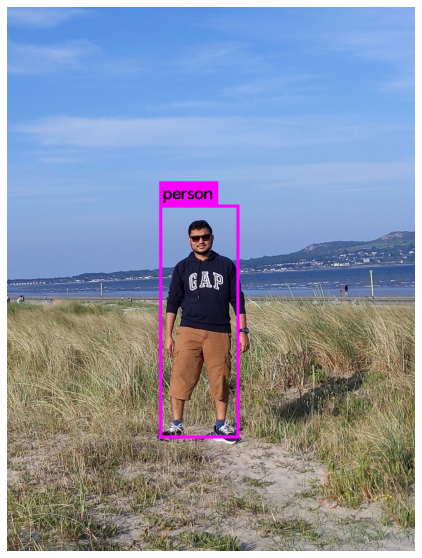

In [22]:

imShow('predictions.jpg')

In [23]:
!./darknet detector test /content/drive/MyDrive/tinier-yolo-bwn-3bit-relu-nomaxpool/voc.data /content/drive/MyDrive/tinier-yolo-bwn-3bit-relu-nomaxpool/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg /content/drive/MyDrive/bckpTinierCustomCfgVoc/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights /content/drive/MyDrive/tinier-yolo-bwn-3bit-relu-nomaxpool/Tesla.jpeg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 2   416 x 416 x   3   ->   208 x 208 x  16  0.037 BFLOPs
    1 conv     64  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  64  0.797 BFLOPs
    2 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    3 conv     64  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x  64  0.797 BFLOPs
    4 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    5 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    6 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    7 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    8 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
    9 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   10 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   11 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512  0.797 BF

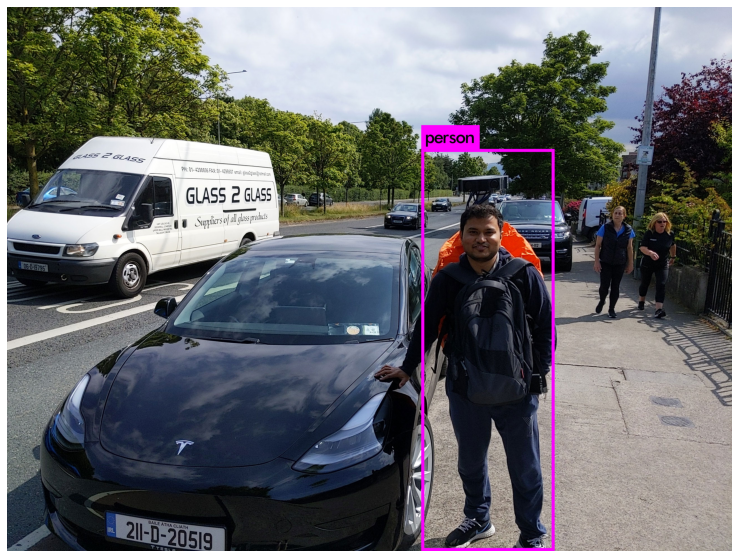

In [25]:
imShow('predictions.jpg')

In [31]:
!./darknet detector demo /content/drive/MyDrive/tinier-yolo-bwn-3bit-relu-nomaxpool/voc.data /content/drive/MyDrive/bckpTinierCustomCfgVoc/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights /content/drive/MyDrive/tinier-yolo-bwn-3bit-relu-nomaxpool/PedestrianVideo/Pedestrians.MP4

Demo
